<a href="https://colab.research.google.com/github/rajbeniwal710/Classification_Models/blob/main/support_vecot_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [2]:
pharma_data = pharma_data.dropna()

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
pharma_data['Treated_with_drugs'] = le.fit_transform(pharma_data['Treated_with_drugs'])

In [4]:
#x-y 
x = pharma_data.iloc[:,:-1]
x = x.drop(['Patient_ID'], axis = 1)
y = pharma_data.iloc[:,-1]
#data cleaning
x = pd.get_dummies(x)

In [5]:
#lets drop some columns to drop dummy trap
x = x.drop(['Patient_Smoker_NO'], axis = 1)
x = x.drop(['Patient_Rural_Urban_URBAN'], axis = 1)
x = x.drop(['ID_Patient_Care_Situation'], axis = 1)

In [6]:
x = x.drop(['Patient_mental_condition_Stable'], axis = 1)

In [7]:
x.loc[x['Patient_Age']>100, 'Patient_Age'] = 100

In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x['Diagnosed_Condition'] = mms.fit_transform(np.array(x['Diagnosed_Condition']).reshape(-1,1))
x['Patient_Age'] = mms.fit_transform(np.array(x['Patient_Age']).reshape(-1,1))
x['Patient_Body_Mass_Index'] = mms.fit_transform(np.array(x['Patient_Body_Mass_Index']).reshape(-1,1))

In [9]:
y = y.astype('category')

In [10]:
#train-validation split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.svm import SVC

In [13]:
#linear kernel
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred1 = svclassifier.predict(X_train)
print("Classification report for train dataset - \n", classification_report(y_train,y_pred1))
# Predicting the values of test data
y_pred2 = svclassifier.predict(X_test)
print("Classification report for test dataset - \n", classification_report(y_test,y_pred2))

Classification report for train dataset - 
               precision    recall  f1-score   support

           0       0.61      0.47      0.53      5480
           1       0.72      0.82      0.77      9158

    accuracy                           0.69     14638
   macro avg       0.66      0.64      0.65     14638
weighted avg       0.68      0.69      0.68     14638

Classification report for test dataset - 
               precision    recall  f1-score   support

           0       0.62      0.49      0.55      2727
           1       0.72      0.82      0.77      4484

    accuracy                           0.69      7211
   macro avg       0.67      0.65      0.66      7211
weighted avg       0.68      0.69      0.68      7211



Text(0.5, 1.0, 'Accuracy Score: 0.6921370128969629')

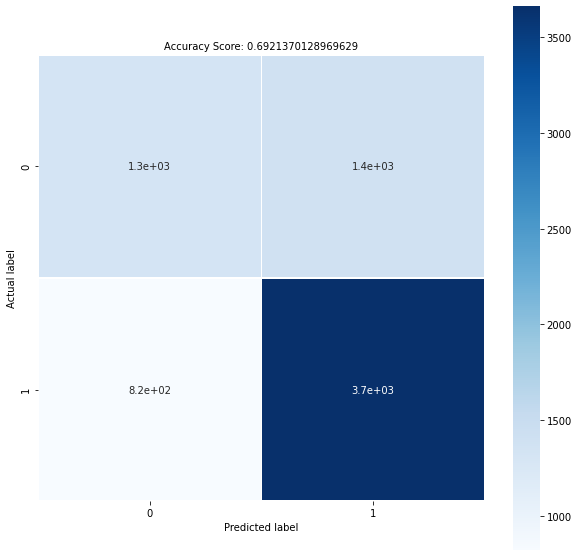

In [14]:
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(10,10))
sns.heatmap(data=cm,linewidths=.8, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(svclassifier.score(X_test, y_test))
plt.title(all_sample_title, size = 10)

In [15]:
#gaussian kernel
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred1 = svclassifier.predict(X_train)
print("Classification report for train dataset - \n", classification_report(y_train,y_pred1))
# Predicting the values of test data
y_pred2 = svclassifier.predict(X_test)
print("Classification report for test dataset - \n", classification_report(y_test,y_pred2))

Classification report for train dataset - 
               precision    recall  f1-score   support

           0       0.66      0.39      0.49      5480
           1       0.71      0.88      0.78      9158

    accuracy                           0.70     14638
   macro avg       0.68      0.64      0.64     14638
weighted avg       0.69      0.70      0.67     14638

Classification report for test dataset - 
               precision    recall  f1-score   support

           0       0.69      0.42      0.52      2727
           1       0.72      0.88      0.79      4484

    accuracy                           0.71      7211
   macro avg       0.70      0.65      0.66      7211
weighted avg       0.70      0.71      0.69      7211



Text(0.5, 1.0, 'Accuracy Score: 0.7082235473582027')

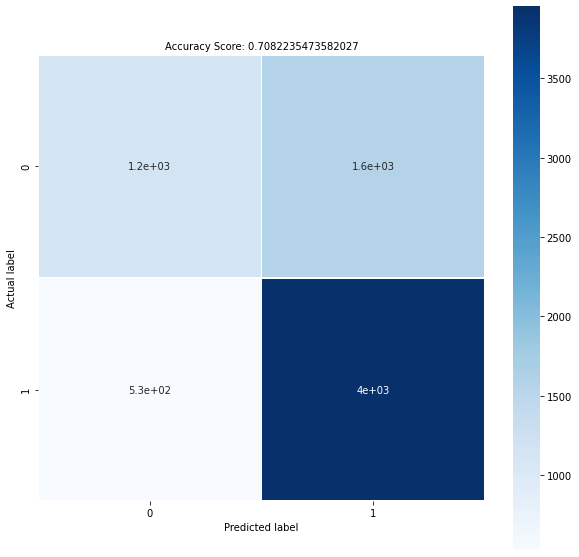

In [16]:
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(10,10))
sns.heatmap(data=cm,linewidths=.8, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(svclassifier.score(X_test, y_test))
plt.title(all_sample_title, size = 10)

In [17]:
#gaussian kernel
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)
y_pred1 = svclassifier.predict(X_train)
print("Classification report for train dataset - \n", classification_report(y_train,y_pred1))
# Predicting the values of test data
y_pred2 = svclassifier.predict(X_test)
print("Classification report for test dataset - \n", classification_report(y_test,y_pred2))

Classification report for train dataset - 
               precision    recall  f1-score   support

           0       0.58      0.61      0.60      5480
           1       0.76      0.74      0.75      9158

    accuracy                           0.69     14638
   macro avg       0.67      0.68      0.67     14638
weighted avg       0.70      0.69      0.69     14638

Classification report for test dataset - 
               precision    recall  f1-score   support

           0       0.58      0.63      0.60      2727
           1       0.76      0.73      0.75      4484

    accuracy                           0.69      7211
   macro avg       0.67      0.68      0.67      7211
weighted avg       0.69      0.69      0.69      7211



Text(0.5, 1.0, 'Accuracy Score: 0.6899181805574817')

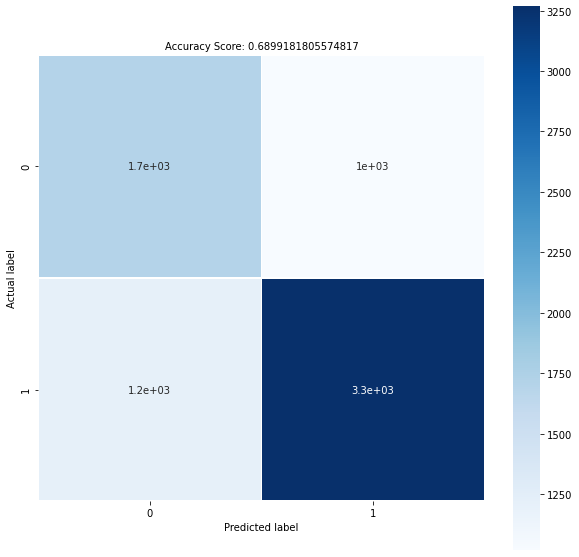

In [18]:
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(10,10))
sns.heatmap(data=cm,linewidths=.8, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(svclassifier.score(X_test, y_test))
plt.title(all_sample_title, size = 10)